In [1]:
import scanpy as sc
import pandas as pd
import os
import scipy.sparse
import numpy as np

## Test neurips

### Read in adata that is used to create the embedding

In [2]:
cell_type_key = 'leiden_res1'

In [3]:
data_path = '/data/ceph/hdd/project/node_08/QNA/scborzoi/submission_data'

In [4]:
adata = sc.read(os.path.join(data_path, 'epicardioids_training_data', 'adata_matched.h5ad'), gex_only=False, backed='r')

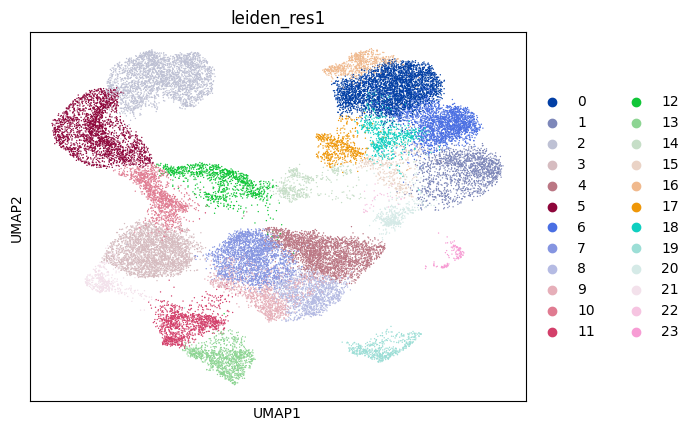

In [5]:
sc.pl.umap(adata, color=cell_type_key)

### Read in adatas that contain the profiles

In [6]:
sample = 'matched'

In [24]:
os.path.join(data_path, 'epicardioids_training_data', f'snapatac_{sample}_plus.h5ad')

'/data/ceph/hdd/project/node_08/QNA/scborzoi/submission_data/epicardioids_training_data/snapatac_matched_plus.h5ad'

In [7]:
adata_plus = sc.read(os.path.join(data_path, 'epicardioids_training_data', f'snapatac_{sample}_plus.h5ad'))

/opt/modules/i12g/anaconda/envs/borzoi-pytorch/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [8]:
adata_minus = sc.read(os.path.join(data_path, 'epicardioids_training_data', f'snapatac_{sample}_minus.h5ad'))

/opt/modules/i12g/anaconda/envs/borzoi-pytorch/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [9]:
adata_atac = sc.read(os.path.join(data_path, 'epicardioids_training_data', f'snapatac_{sample}_atac.h5ad'))

/opt/modules/i12g/anaconda/envs/borzoi-pytorch/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


### Read in neighbors and embedding

In [10]:
embedding = pd.read_parquet(os.path.join(data_path, 'epicardioids_training_data', 'embedding.pq'))

### Read in cell type to idx mapping

In [11]:
celltypes = pd.read_parquet(os.path.join(data_path, 'epicardioids_training_data', 'celltype.pq'))

### Test that adata, and profile adata have the same order

In [12]:
assert (adata.obs_names == adata_plus.obs_names).all()

In [13]:
assert (adata.obs_names == adata_minus.obs_names).all()

In [14]:
assert (adata.obs_names == adata_atac.obs_names).all()

### Test that profile adatas are correct

In [15]:
# test that adata_plus has positive values and not too large
assert (adata_plus.obsm['fragment_single'].data < 0).any() == False

In [16]:
adata_plus.obsm['fragment_single'].data.max()

105

In [17]:
# test that adata_minus has negative values not too small
assert (adata_minus.obsm['fragment_single'].data > 0).any() == False

In [18]:
adata_minus.obsm['fragment_single'].data.min()

-105

### Test that embeddings have the correct order

In [19]:
assert (embedding.obs_names == adata_plus.obs_names).all()

## Test that celltypes index are correct

In [20]:
for i, row in celltypes.iterrows():
    print(row['celltype'])
    assert adata_plus[row['cellindex']].obs[cell_type_key].unique() == row['celltype']

0
14
5
2
4
20
13
10
11
7
1
6
15
19
8
9
3
21
18
12
16
17
23
22


In [21]:
for i, row in celltypes.iterrows():
    print(row['celltype'])
    assert adata_minus[row['cellindex']].obs[cell_type_key].unique() == row['celltype']

0
14
5
2
4
20
13
10
11
7
1
6
15
19
8
9
3
21
18
12
16
17
23
22


In [22]:
adata_atac.obs = adata_atac.obs.join(adata.obs)

In [23]:
for i, row in celltypes.iterrows():
    print(row['celltype'])
    assert adata_atac[row['cellindex']].obs[cell_type_key].unique() == row['celltype']

0
14
5
2
4
20
13
10
11
7
1
6
15
19
8
9
3
21
18
12
16
17
23
22
